In [2]:
# Import libraries

import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
#load sample images
images = []
def load_images(foldername):
    for filename in os.listdir(foldername):
        if filename == ".DS_Store":
            continue
        input = Image.open(os.path.join(foldername,filename))
        print(filename)
        
        if input is not None:
            images.append(input)
    return images
img_list = load_images("/Users/hannahzhang/Downloads/11khands_test_ims/")

Hand_0000003.jpg
Hand_0000002.jpg
Hand_0000005.jpg
Hand_0000011.jpg
Hand_0000010.jpg
Hand_0000004.jpg
Hand_0000006.jpg
Hand_0000007.jpg
Hand_0000009.jpg
Hand_0000008.jpg


In [4]:
from rembg import remove

In [5]:
removed_ims = []

for im in images:
    output = remove(im)
    removed_ims.append(output)
    output.show()

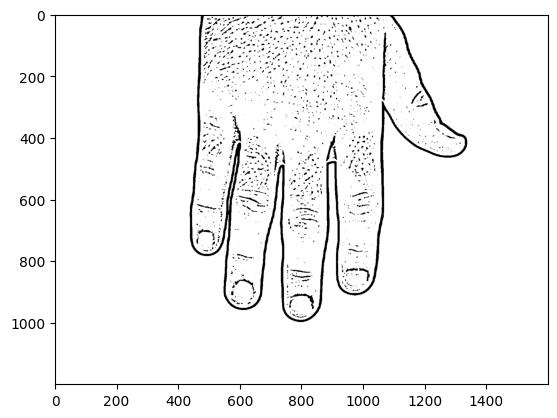

In [6]:
import cv2 
import matplotlib.pyplot as plt 
from numpy import asarray

for im in removed_ims:

    image = np.array(im)

    # gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    (T, thresh) = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)

    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 3)

    RGB_thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_thresh)

#cv2.imwrite('a1.jpg', thresh)

In [7]:
import sys
sys.path.append('../src')  # Add the 'src' directory to the Python path

from dermaml import features

In [ ]:
compute_glcm(removed_ims[1])

In [9]:
import skimage
from skimage import feature

In [10]:

#TO DO: Should image processing happen outside of the function?
arr = np.array(removed_ims[1])

#TO DO: move color processing outside of function
opencvim = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

def compute_glcm(im):

    # Calculate the co-occurrence matrix for the image
    co_matrix = skimage.feature.graycomatrix(opencvim, [5], [0], levels=256, symmetric=True, normed=True)

    # Calculate texture features from the co-occurrence matrix
    contrast = skimage.feature.graycoprops(co_matrix, 'contrast')
    correlation = skimage.feature.graycoprops(co_matrix, 'correlation')
    energy = skimage.feature.graycoprops(co_matrix, 'energy')
    homogeneity = skimage.feature.graycoprops(co_matrix, 'homogeneity')
    
    print("Contrast:", contrast)
    print("Correlation:", correlation)
    print("Energy:", energy)
    print("Homogeneity:", homogeneity)

In [12]:
compute_glcm(opencvim)

Contrast: [[187.26301881]]
Correlation: [[0.98246968]]
Energy: [[0.68306009]]
Homogeneity: [[0.74405321]]
